In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('U.S._Chronic_Disease_Indicators.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2020,2020,US,United States,BRFSS,Health Status,Recent activity limitation among adults,NaN,Number,Age-adjusted Mean,...,HEA,HEA04,NaN,AGEADJMEAN,SEX,SEXF,NaN,NaN,NaN,NaN
1,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,SEX,SEXM,NaN,NaN,NaN,NaN
2,2015,2019,CA,California,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...",NaN,Number,Number,...,CAN,CAN03,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Number,Number,...,CAN,CAN07,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
4,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...",NaN,Number,Number,...,CAN,CAN05,NaN,NMBR,RACE,WHT,NaN,NaN,NaN,NaN


In [5]:
print(f'The dataset shape is  : {df.shape}')

The dataset shape is  : (309215, 34)


In [6]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  309215 non-null  int64  
 1   YearEnd                    309215 non-null  int64  
 2   LocationAbbr               309215 non-null  object 
 3   LocationDesc               309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [8]:
print(f'The number of duplicates : {df.duplicated().sum()}')

The number of duplicates : 0


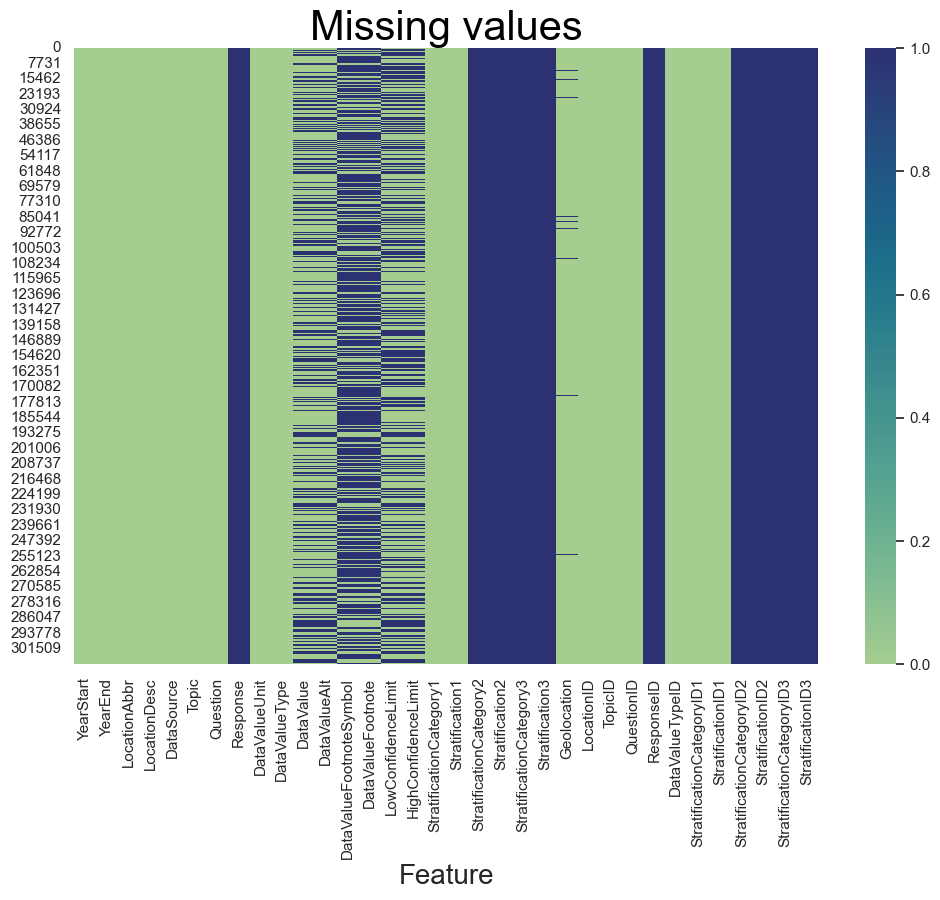

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull() , cmap="crest")
plt.xlabel('Feature' , size=20)
plt.title('Missing values' , color='black' ,size=30)
plt.show()

In [11]:
full_missed_columns = ['Response' , 'StratificationCategory2','Stratification2' ,'StratificationCategory3',
                      'Stratification3' , 'ResponseID' , 'StratificationCategoryID2' , 'StratificationID2',
                      'StratificationCategoryID3','StratificationID3']
df.drop(columns=full_missed_columns , inplace=True)

In [12]:
import pandas as pd
import numpy as np

def df_details(dataset):
    column = []
    dtype = []
    unique = []
    count = []
    missing = []
    missing_percent = []
    mean_ = []
    std_ = []
    min_ = []
    max_ = []

    for col in dataset.columns:
        column.append(col)
        dtype.append(dataset[col].dtype)
        unique.append(dataset[col].nunique())
        count.append(len(dataset[col]))
        missing.append(dataset[col].isna().sum())
        missing_percent.append((dataset[col].isna().sum() * 100) / len(dataset))
        
        if dataset[col].dtype in ['int64', 'float64']:
            mean_.append(round(dataset[col].mean(), 2))
            std_.append(round(dataset[col].std(), 2))
            min_.append(round(dataset[col].min(), 2))
            max_.append(round(dataset[col].max(), 2))
        else:
            mean_.append('N/A')
            std_.append('N/A')
            min_.append('N/A')
            max_.append('N/A')

    datainfo = pd.DataFrame({
        'Feature': column,
        'Dtype': dtype,
        'Unique Values': unique,
        'Total Count': count,
        'Missing Values': missing,
        'Missing %': missing_percent,
        'Mean': mean_,
        'Std Dev': std_,
        'Min': min_,
        'Max': max_
    })

    return datainfo


In [14]:
df.YearStart.value_counts().sort_index().to_frame().T

YearStart,2015,2016,2018,2019,2020,2021,2022
count,8760,8760,2678,88823,67999,87600,44595


In [13]:
print(f'{len(df.columns)}')

df_details(df)

24


,Feature,Dtype,Unique Values,Total Count,Missing Values,Missing %,Mean,Std Dev,Min,Max
0,YearStart,int64,7,309215,0,0.000000,2020.01,1.53,2015,2022
1,YearEnd,int64,4,309215,0,0.000000,2020.29,1.07,2019,2022
2,LocationAbbr,object,55,309215,0,0.000000,N/A,N/A,N/A,N/A
3,LocationDesc,object,55,309215,0,0.000000,N/A,N/A,N/A,N/A
4,DataSource,object,14,309215,0,0.000000,N/A,N/A,N/A,N/A
5,Topic,object,19,309215,0,0.000000,N/A,N/A,N/A,N/A
6,Question,object,109,309215,0,0.000000,N/A,N/A,N/A,N/A
7,DataValueUnit,object,8,309215,0,0.000000,N/A,N/A,N/A,N/A
8,DataValueType,object,12,309215,0,0.000000,N/A,N/A,N/A,N/A
9,DataValue,float64,14852,309215,100019,32.346102,694.36,16203.41,0.0,2925456.0


In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Drop rows where DataValue is missing
df_clean = df.dropna(subset=['DataValue'])

# Bin the DataValue column into 3 balanced categories
df_clean['ValueBin'] = pd.qcut(df_clean['DataValue'], q=3, labels=['Low', 'Medium', 'High'])

# Step 3: Extract 1% of the data (stratified by ValueBin)
df_1percent, _ = train_test_split(
    df_clean,
    test_size=0.99,
    stratify=df_clean['ValueBin'],
    random_state=42
)

# Step 4: Drop the helper column
df_1percent.drop(columns='ValueBin', inplace=True)

# Step 5: Save to CSV
df_1percent.to_csv("chronic_disease_sample_1percent.csv", index=False)

print("✅ 1% balanced sample saved as 'chronic_disease_sample_1percent.csv'")

✅ 1% balanced sample saved as 'chronic_disease_sample_1percent.csv'
